### 시간 조작

In [1]:
### 데이터 처리 라이브러리
import pandas as pd

In [2]:
### 임의 시간 유형 데이터
dates = ["2020-01-01", "2020-03-01", "2020-04-01"]
print(type(dates))
dates

<class 'list'>


['2020-01-01', '2020-03-01', '2020-04-01']

In [3]:
### dates 타입을 날짜 타입으로 형변환하기
ts_dates = pd.to_datetime(dates)
print(type(ts_dates))
ts_dates

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2020-01-01', '2020-03-01', '2020-04-01'], dtype='datetime64[ns]', freq=None)

In [4]:
ts_dates[0]

Timestamp('2020-01-01 00:00:00')

### 날짜 타입의 데이터에서 년월일 단위 데이터 추출하기

In [5]:
### 년(0000) 포멧으로 데이터 추출
pr_year = ts_dates.to_period(freq="Y")
pr_year

PeriodIndex(['2020', '2020', '2020'], dtype='period[Y-DEC]')

In [6]:
### 년-월(0000-00) 포멧으로 데이터 추출
pr_month = ts_dates.to_period(freq="M")
pr_month

PeriodIndex(['2020-01', '2020-03', '2020-04'], dtype='period[M]')

In [7]:
### 년-월-일(0000-00-00) 포멧으로 데이터 추출
pr_day = ts_dates.to_period(freq="D")
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2020-04-01'], dtype='period[D]')

### timeseries.csv 파일 읽어오기

In [8]:
### 변수명 : df
df = pd.read_csv("./data/timeseries.csv")
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [9]:
### 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


### 새로운 시간 데이터 타입의 컬럼 생성

In [10]:
### 데이터 컬럼 중 Date 컬럼을 이용해서 새로운 new_Date 컬럼 생성
# - new_Date 컬럼의 데이터 타입은 날짜 타입으로 컬럼 생성
df["new_Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes


In [11]:
### new_Date의 0번째 값을 추출
# - 3가지 방법으로 진행
# 1
df["new_Date"][0]

# 2
df["new_Date"].iloc[0] ## 인덱스 번호

# 3
df["new_Date"].loc[0] ## 값

Timestamp('2015-07-02 00:00:00')

In [12]:
### Date 컬럼 삭제
df.drop("Date", axis=1, inplace=True)
# df.drop(columns="Date", inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Close     5 non-null      int64         
 1   Start     5 non-null      int64         
 2   High      5 non-null      int64         
 3   Low       5 non-null      int64         
 4   Volume    5 non-null      int64         
 5   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 368.0 bytes


In [13]:
### new_Date 컬럼을 인덱스로 변환
df.set_index("new_Date", inplace=True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


### 기간 설정하기

- 2020년 1월 1일을 시작, 종료 년도는 없음
- 6개의 구간으로 나누기
- 시간 간격을 년단위로 설정
- 시간대는 아시아/서울 시간대를 기준으로 처리

In [14]:
pd.date_range(
    # 기간의 시작 값
    start="2020-01-01",
    # 기간의 끝 값(끝이 없으면 None)
    end=None,
    # 시간의 구간 갯수
    periods=6,
    # 시간 간격(Y는 년단위)
    freq="Y",
    # 국제 시간대
    tz="Asia/Seoul"
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12696\805854081.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(


DatetimeIndex(['2020-12-31 00:00:00+09:00', '2021-12-31 00:00:00+09:00',
               '2022-12-31 00:00:00+09:00', '2023-12-31 00:00:00+09:00',
               '2024-12-31 00:00:00+09:00', '2025-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='YE-DEC')

In [15]:
### 2020년 1월 1일부터 3개의 구간으로 2년 단위 기간 범위 값을 만들기
pd.date_range(
    # 기간의 시작 값
    start="2020-01-01",
    # 기간의 끝 값(끝이 없으면 None)
    end=None,
    # 시간의 구간 갯수
    periods=3,
    # 시간 간격(Y는 년단위)
    freq="2Y",
    # 국제 시간대
    tz="Asia/Seoul"
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12696\2734998830.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(


DatetimeIndex(['2020-12-31 00:00:00+09:00', '2022-12-31 00:00:00+09:00',
               '2024-12-31 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='2YE-DEC')

In [16]:
### 2020년 1월 1일부터 3개의 구간으로 2분 단위 기간 범위 값을 만들기
pd.date_range(
    # 기간의 시작 값
    start="2020-01-01",
    # 기간의 끝 값(끝이 없으면 None)
    end=None,
    # 시간의 구간 갯수
    periods=3,
    # 시간 간격(Y는 년단위)
    freq="2MIN",
    # 국제 시간대
    tz="Asia/Seoul"
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12696\2117407935.py:2: FutureWarning: 'MIN' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.date_range(


DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-01-01 00:02:00+09:00',
               '2020-01-01 00:04:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='2min')

In [17]:
### 2020년 1월 1일부터 3개의 구간
# 2일 2시간 2분 2초 단위 기간 범위 값을 만들기
pd.date_range(
    # 기간의 시작 값
    start="2020-01-01",
    # 기간의 끝 값(끝이 없으면 None)
    end=None,
    # 시간의 구간 갯수
    periods=3,
    # 시간 간격(Y는 년단위)
    freq="2D 2H 2MIN 2S",
    # 국제 시간대
    tz="Asia/Seoul"
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12696\789541595.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12696\789541595.py:3: FutureWarning: 'MIN' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.date_range(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12696\789541595.py:3: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  pd.date_range(


DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-01-03 02:02:02+09:00',
               '2020-01-05 04:04:04+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='180122s')

In [18]:
### df 데이터 프레임의 날짜 인덱스를 다시 컬럼으로 변환
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   new_Date  5 non-null      datetime64[ns]
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 368.0 bytes


In [19]:
df

,new_Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [20]:
### 년(Year), 월(Month), 일(Day) 컬럼 생성
df["Year"] = df["new_Date"].dt.year
df["Month"] = df["new_Date"].dt.month
df["Day"] = df["new_Date"].dt.day

df

,new_Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019,6,26


In [21]:
### new_Date 컬럼을 다시 인덱스로 변환
df.set_index("new_Date", inplace=True)

In [22]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
 5   Year    5 non-null      int32
 6   Month   5 non-null      int32
 7   Day     5 non-null      int32
dtypes: int32(3), int64(5)
memory usage: 300.0 bytes


,Close,Start,High,Low,Volume,Year,Month,Day
new_Date,,,,,,,,
2015-07-02,10100,10850,10900,10000,137977,2015,7,2
2016-06-29,10700,10550,10900,9990,170253,2016,6,29
2017-06-28,10400,10900,10950,10150,155769,2017,6,28
2018-06-27,10900,10800,11050,10500,133548,2018,6,27
2019-06-26,10800,10900,11000,10700,63039,2019,6,26


In [23]:
### 2016년 6월 29일에 대한 행 데이터 조회
# 인덱스 값을 이용해 추출 : loc
df.loc["2016-06-29"]

# df.iloc[1] -> 인덱스 번호를 이용해 추출

Close      10700
Start      10550
High       10900
Low         9990
Volume    170253
Year        2016
Month          6
Day           29
Name: 2016-06-29 00:00:00, dtype: int64

In [25]:
### 2016년 6월 29일부터 2018년 12월 31일까지의 데이터 조회
df.loc["2016-06-29" : "2018-12-31"]

,Close,Start,High,Low,Volume,Year,Month,Day
new_Date,,,,,,,,
2016-06-29,10700,10550,10900,9990,170253,2016,6,29
2017-06-28,10400,10900,10950,10150,155769,2017,6,28
2018-06-27,10900,10800,11050,10500,133548,2018,6,27


### 시각화

In [26]:
### X축은 년월일, Y축은 각 컬럼들의 값
# - 선그래프 그리기
# - 선은 각 컬럼별로 그리기
# - 하나의 그래프 내에 모든 컬럼의 선 그리기
# - 단, 년, 월, 일 컬럼은 제외

### 시각화 라이브러리 정의
import matplotlib.pyplot as plt

# 한글처리
plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

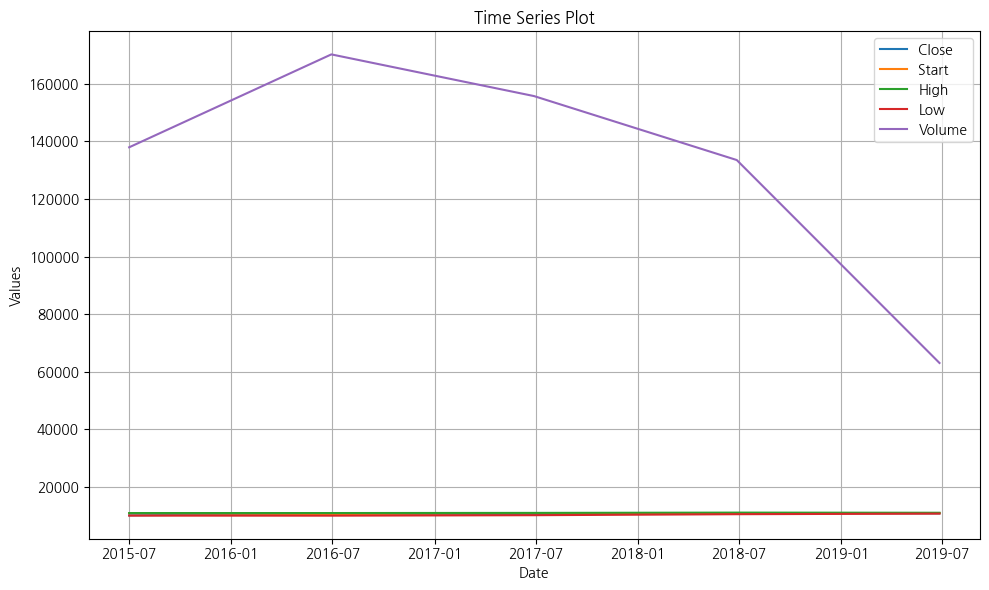

In [ ]:
# 년, 월, 일 컬럼 제외한 컬럼만 추출
df_plot = df.drop(columns=['Year', 'Month', 'Day'])

# 그래프 그리기
plt.figure(figsize=(10, 6))
for column in df_plot.columns:
    plt.plot(df_plot.index, df_plot[column], label=column)

plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='new_Date'>

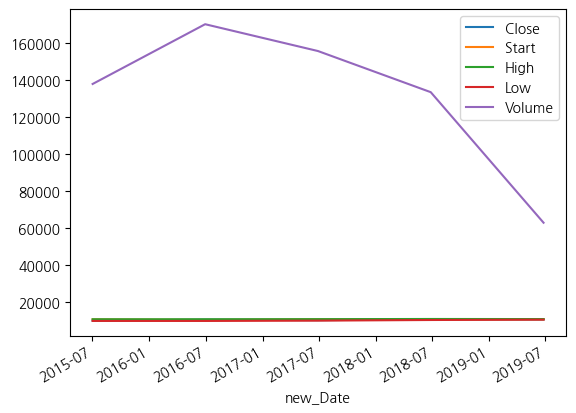

In [29]:
df_plot.plot()